# Horizontal-to-Vertical Spectral Ratio (HVSR) Measurements from Earthquake Recordings (eHVSR)

## License Information

This file is part of _hvsrpy_, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2024 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_

_hvsrpy_ is an open-source Python package for performing horizontal-to-vertical spectral ratio (HVSR) processing of microtremor and earthquake recordings. _hvsrpy_ was developed by [Jospeh P. Vantassel](https://www.jpvantassel.com/) with contributions from Dana M. Brannon under the supervision of Brady R. Cox at The University of Texas at Austin. _hvsrpy_ continues to be developed and maintained by [Joseph P. Vantassel and his research group at Virginia Tech](https://geoimaging-research.org/).

## Citation

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for hvsrpy, please use the citation tool on the hvsrpy
[archive](http://doi.org/10.5281/zenodo.3666956)._

## About this notebook

This notebook illustrates how _hvsrpy_ can be used for performing HVSR on earthquake records (eHVSR).

The data presented in this notebook is from the Pacific Earthquake Engineering Research (PEER) Center's Next Generation Attenuation-West2 (NGA-West2) database (Ancheta et al., 2014). If you use this data, please also cite Ancheta et al. (2014.

>Ancheta, T.D., Darragh, R.B., Stewart, J.P., Seyhan, E., Silva, W.J., Chiou, B.S.-J., Wooddell, K.E., Graves, R.W., Kottke, A.R.,
>Boore, D.M., Kishida, T., and Donahue, J.L. (2014). NGA-West2 Database. Earthquake Spectra 30, 989–1005.
>[https://doi.org/10.1193/070913EQS197M](https://doi.org/10.1193/070913EQS197M)

The lognormal statistics implemented in _hvsrpy_ were developed by Cox et al. (2020).
If you use this feature, please also cite Cox et al. (2020) to recognize their original work.

> Cox, B. R., Cheng, T., Vantassel, J. P., & Manuel, L. (2020). "A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements. Geophysical Journal International, 221(3), 2170–2183.
> https://doi.org/10.1093/gji/ggaa119


## Getting Started

1. Install _hvsrpy_, with `pip install hvsrpy`. More information on _pip_ can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__
2. Try analyzing the provided example. __(~10 minutes)__
3. Try your own files by changing the file names below. __(~15 minutes)__

Happy Processing!

In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import hvsrpy

plt.style.use(hvsrpy.HVSRPY_MPL_STYLE)

## Input Data

In [2]:
# Note in general you will want to use more than five earthquake recordings
# to robustly estimate the site's eHVSR. Only five recordings are listed here
# for simplicity.
fnames = [
    [f"data/RSN8197_ANZA1_CICWC{c}.VT2" for c in ["HHZ", "HHE", "HHN"]],
    [f"data/RSN8321_YLINDA_CICWC{c}.VT2" for c in ["HHZ", "HHE", "HHN"]],
    [f"data/RSN8383_BEARCTY_CICWC{c}.VT2" for c in ["HHZ", "HHE", "HHN"]],
    [f"data/RSN9175_14095628_CICWC{c}.VT2" for c in ["HLZ", "HLE", "HLN"]],
    [f"data/RSN9687_14186612_CICWC{c}.VT2" for c in ["HHZ", "HHE", "HHN"]],
]

print(f"Number of recordings: {len(fnames)}")
for fname_set in fnames:
    for file in fname_set:
        if not pathlib.Path(file).exists():
            raise FileNotFoundError(f"file {file} not found; check spelling.")
print("All files exists.")

Number of recordings: 5
All files exists.


## Preprocessing Settings

In [3]:
preprocessing_settings = hvsrpy.settings.HvsrPreProcessingSettings()
preprocessing_settings.detrend = "constant"
preprocessing_settings.window_length_in_seconds = None
preprocessing_settings.orient_to_degrees_from_north = 0.0
preprocessing_settings.filter_corner_frequencies_in_hz = (None, None)
preprocessing_settings.ignore_dissimilar_time_step_warning = False

print("Preprocessing Summary")
print("-"*60)
preprocessing_settings.psummary()

Preprocessing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
orient_to_degrees_from_north             : 0.0
filter_corner_frequencies_in_hz          : (None, None)
window_length_in_seconds                 : None
detrend                                  : constant
preprocessing_method                     : hvsr


## Processing Settings

In [4]:
processing_settings = hvsrpy.settings.HvsrTraditionalProcessingSettings()
processing_settings.window_type_and_width = ("tukey", 0.2)
processing_settings.smoothing=dict(operator="konno_and_ohmachi",
                                   bandwidth=40,
                                   center_frequencies_in_hz=np.geomspace(0.4, 40, 128))
processing_settings.method_to_combine_horizontals = "geometric_mean"
processing_settings.handle_dissimilar_time_steps_by = "frequency_domain_resampling"

print("Processing Summary")
print("-"*60)
preprocessing_settings.psummary()

Processing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
orient_to_degrees_from_north             : 0.0
filter_corner_frequencies_in_hz          : (None, None)
window_length_in_seconds                 : None
detrend                                  : constant
preprocessing_method                     : hvsr


## Calculate HVSR

In [5]:
srecords = hvsrpy.read(fnames)
srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
hvsr = hvsrpy.process(srecords, processing_settings)

## Summarize HVSR Results


Statistical Summary:
--------------------


,Exponentitated Lognormal Median (units),Lognormal Standard Deviation (log units),-1 Lognormal Standard Deviation (units),+1 Lognormal Standard Deviation (units)
"Resonant Site Frequency, fn (Hz)",4.224,0.073,3.928,4.541
"Resonant Site Period, Tn (s)",0.237,0.073,0.255,0.220
"Resonance Amplitude, An",3.983,0.220,3.196,4.964


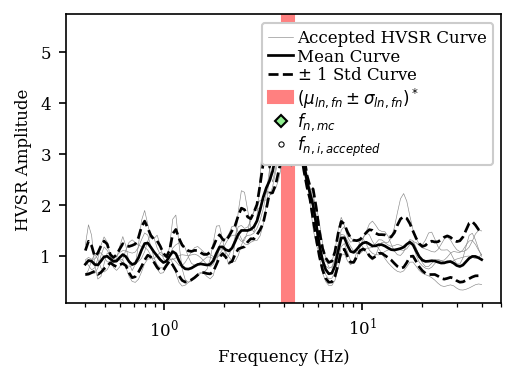

In [6]:
print("\nStatistical Summary:")
print("-"*20)
hvsrpy.summarize_hvsr_statistics(hvsr)
(fig, ax) = hvsrpy.plot_single_panel_hvsr_curves(hvsr)
plt.show()

## Save HVSR Results

In [7]:
save_figure = False
save_results = False
fname_prefix = "example_ehvsr_traditional"

if save_figure:
    fname = f"{fname_prefix}.png"
    fig.savefig(fname)
    plt.close()
    print(f"Figure saved successfully to {fname}!")

if save_results:
    fname = f"{fname_prefix}.csv"
    hvsrpy.object_io.write_hvsr_object_to_file(hvsr, fname)
    print(f"Results saved successfully to {fname}!")